In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_labels = pd.read_csv('train_labels.csv')
df_values = pd.read_csv('train_values.csv')

In [2]:
df_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
df_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
# merge the labels and values
merged_df = pd.merge(df_values, df_labels, how='inner', on='patient_id')

In [15]:
#merged_df["heart_disease_present"]

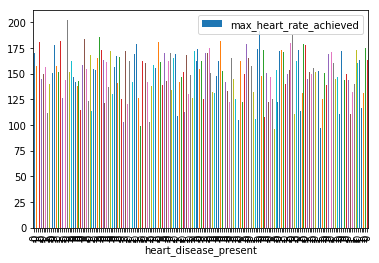

In [6]:
merged_df.plot(x="heart_disease_present", y="max_heart_rate_achieved", kind="bar")

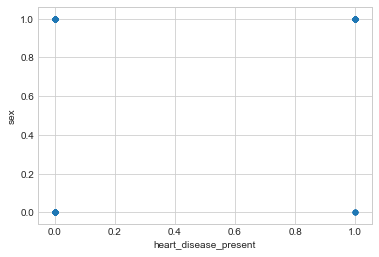

In [17]:
merged_df.plot(x="heart_disease_present", y="sex", kind="scatter")

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

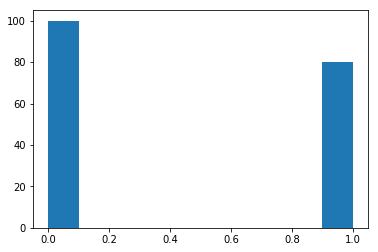

In [7]:
plt.hist(merged_df["heart_disease_present"])

In [8]:
# correlation matrix
merged_df.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


In [9]:
# binning your data
bins = [0, 19.50, 39.50, 59.60, 79.50, 9999]
labels = ['<20', '20-39', '40-59', '60-79', '80+']
merged_df["age_group"] = pd.cut(merged_df["age"], bins=bins, labels=labels)

In [10]:
merged_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,40-59
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,40-59
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,60-79
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,40-59
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,40-59


In [46]:
#drop NaN from heart disease present
merged_df_1 = merged_df.drop(merged_df.index[(merged_df.heart_disease_present.eq(0))])
merged_df_0 = merged_df.drop(merged_df.index[(merged_df.heart_disease_present.eq(1))])



In [48]:
merged_df_0.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,40-59
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,40-59
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,40-59
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0,40-59
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0,40-59


In [45]:
list(merged_df_1['resting_blood_pressure'])

[125,
 152,
 150,
 150,
 170,
 140,
 120,
 144,
 130,
 136,
 140,
 150,
 140,
 112,
 128,
 124,
 120,
 140,
 130,
 130,
 130,
 110,
 120,
 110,
 130,
 130,
 126,
 130,
 120,
 126,
 178,
 124,
 145,
 130,
 120,
 110,
 128,
 118,
 140,
 100,
 140,
 145,
 110,
 160,
 124,
 140,
 180,
 110,
 132,
 138,
 138,
 160,
 145,
 120,
 132,
 125,
 130,
 150,
 140,
 110,
 128,
 134,
 108,
 128,
 120,
 112,
 130,
 160,
 130,
 117,
 160,
 142,
 120,
 150,
 112,
 118,
 140,
 125,
 180,
 125]

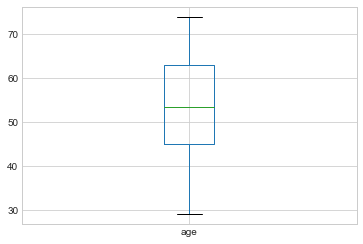

In [49]:
merged_df_0.boxplot(column=["age"])

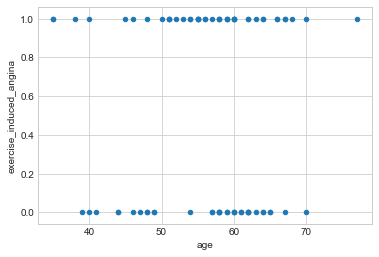

In [39]:
merged_df_1.plot(x="age", y="exercise_induced_angina", kind="scatter")

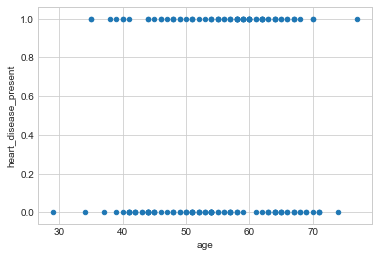

In [21]:
merged_df.plot(x="age", y="heart_disease_present", kind="scatter")

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

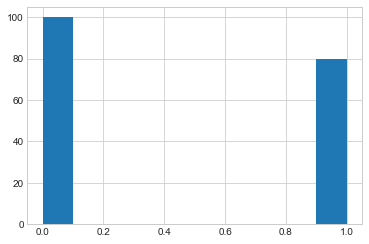

In [28]:
#plt.hist(merged_df["heart_disease_present"])

plt.hist(merged_df["heart_disease_present"])

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [14]:
x = np.heart_disease_present
y = np.age_group

plt.plot(x, y, 'o', color='black');

AttributeError: module 'numpy' has no attribute 'heart_disease_present'